# Ebola virus<br>
#### the data set is collected from:<br>https://en.wikipedia.org/wiki/West_African_Ebola_virus_epidemic_timeline_of_reported_cases_and_deaths

In [17]:
wikiData = readdlm("wikipediaEVDraw.csv",',')

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955   
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955   
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955   
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955   
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955   
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955   
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955   
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955   
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955   
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953   
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953   
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953   
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952   
 ⋮                                        ⋱  

In [4]:
DateTime(wikiData[1,1],"d u y")#converting a date of the data file into julia compatible date time formate

2015-11-25T00:00:00

In [9]:
#julia for loop
#method 1:range formate
println("method-1\n")
for num = 3:7
    println("the number is $num")
end
#method 2:iterating over an array
println("\nmethod-2\n")
values = [23,"this is not a name",'α']
for x in values
    println("the values of x is now $x")
end

method-1

the number is 3
the number is 4
the number is 5
the number is 6
the number is 7

method-2

the values of x is now 23
the values of x is now this is not a name
the values of x is now α


### converting csv file to julia compatible date time formate


In [10]:
col1 = wikiData[:,1]#colon mean all the data in the column;1 mean 1st column


54-element Array{Any,1}:
 "25 Nov 2015"
 "18 Nov 2015"
 "11 Nov 2015"
 "4 Nov 2015" 
 "25 Oct 2015"
 "18 Oct 2015"
 "11 Oct 2015"
 "27 Sep 2015"
 "20 Sep 2015"
 "13 Sep 2015"
 "6 Sep 2015" 
 "30 Aug 2015"
 "16 Aug 2015"
 ⋮            
 "9 Aug 2014" 
 "30 Jul 2014"
 "23 Jul 2014"
 "14 Jul 2014"
 "2 Jul 2014" 
 "17 Jun 2014"
 "27 May 2014"
 "12 May 2014"
 "1 May 2014" 
 "14 Apr 2014"
 "31 Mar 2014"
 "22 Mar 2014"

In [14]:
#there are 54 elements that has to be formated
for i = 1:54
    col1[i] = DateTime(col1[i],"d u y")
end

In [15]:
col1

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮                  
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

### epidemic day calculation

**Date.datetime2rata()** function will calculate the time passes from january 1 of year 1 to current date(or epidemic day)

the variable **epiday** will store how long the disease has been running

the function **dis_since_epiday()** will calculate the number of days since the epidemic day is 0

for more info:https://en.wikipedia.org/wiki/Rata_Die

In [27]:
dis_since_epiday(x)=Dates.datetime2rata(x)-Dates.datetime2rata(col1[54])
epidays = Array{Int32}(54)
for i =1:54
    epidays[i] = dis_since_epiday(col1[i])
end

In [28]:
epidays

54-element Array{Int32,1}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
 533
 526
 512
   ⋮
 140
 130
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

In [30]:
#replacing column 1 of wikidata with epidays
wikiData[:,1] = epidays
writedlm("wikipediaEVDdatesformated.csv",wikiData,',')

## Simple ploting using plot package

**wikiData** represent the Ebola virus datasets<br>
**epidays** stores the value of days the disease is running(column 1 of the dataset)<br>
**allcases** stores the number of ebola virus case(column 2 of the dataset).

In [3]:
wikiData = readdlm("wikipediaEVDdatesformated.csv",',')

54×9 Array{Any,2}:
 613  28637  11314  3804  2536  10675     4808     14122     3955   
 606  28634  11314  3804  2536  10672     4808     14122     3955   
 599  28635  11314  3805  2536  10672     4808     14122     3955   
 592  28607  11314  3810  2536  10672     4808     14089     3955   
 582  28539  11298  3806  2535  10672     4808     14061     3955   
 575  28476  11298  3803  2535  10672     4808     14001     3955   
 568  28454  11297  3800  2534  10672     4808     13982     3955   
 554  28388  11296  3805  2533  10672     4808     13911     3955   
 547  28295  11295  3800  2532  10672     4808     13823     3955   
 540  28220  11291  3792  2530  10672     4808     13756     3953   
 533  28147  11291  3792  2530  10672     4808     13683     3953   
 526  28073  11290  3792  2529  10672     4808     13609     3953   
 512  27952  11284  3786  2524  10672     4808     13494     3952   
   ⋮                                ⋮                               
 140   1835   1

In [4]:
epiday = wikiData[:,1];
allcases = wikiData[:,2];

In [5]:
allcases

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

### Graph type-1

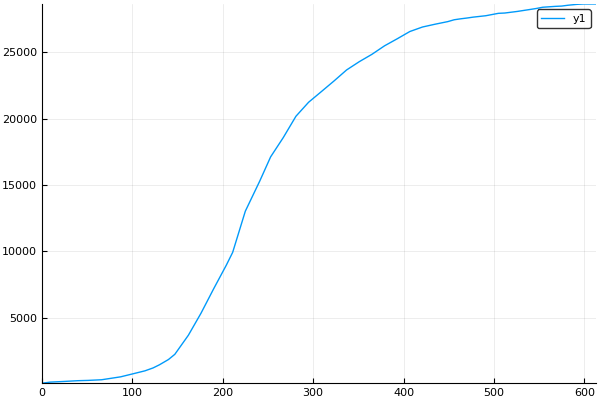

In [7]:
using Plots
pyplot()
plot(epiday,allcases)

### Graph type-2

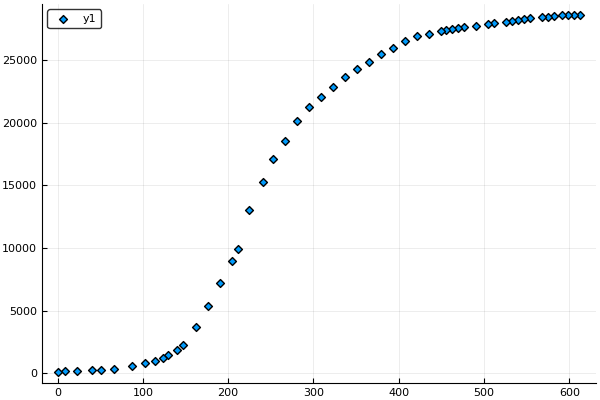

In [8]:
plot(epiday,allcases,linetype= :scatter,marker= :diamond)

### Graph type-3

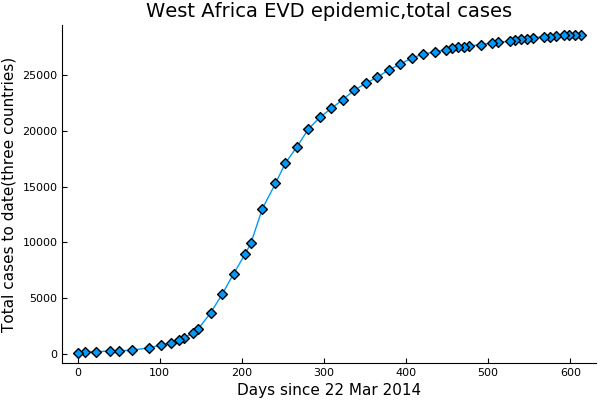

In [15]:
plot(epiday,allcases,
title = "West Africa EVD epidemic,total cases",
xlabel = "Days since 22 Mar 2014",
ylabel = "Total cases to date(three countries)",
marker = (:diamond,5),
linetype = :path,
legend = false,
grid = false
)

### Save the current plot
default save file is png but you can save as pdf in that case you have to mention the filetype eg:<br>
`savefig("filename.pdf")`

In [16]:
savefig("WestAfricaEVD_noFormateSpecified")